In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# from matplotlib.pyplot import figure

# figure(figsize=(8, 6), dpi=80)

In [4]:
import pandas as pd

In [5]:
sf = pd.read_csv("/content/gdrive/MyDrive/PROJECTS/14. Startup Project-Case Study/startup_funding.csv",dtype=str)

##DATA CLEANING AND PREPROCESSING

In [6]:
sf["AmountInUSD"].fillna("0",inplace=True)

In [7]:
sf

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake"


In [8]:
temp_sf = sf.copy()

In [9]:
sf.fillna("unknown",inplace=True)

In [10]:
sf.drop("SNo",axis=1,inplace=True)

In [11]:
def casechange(s):
  return s.lower()

for elt in sf.columns:
  sf[elt]=sf[elt].apply(casechange)
  

In [12]:
def removecomma(s):
  t=0
  for e in s:
    if e==',':
      continue
    t = t*10+int(float(e))
  return t
sf["AmountInUSD"]=sf["AmountInUSD"].apply(removecomma)

In [13]:
sf

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,01/08/2017,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000,unknown
1,02/08/2017,ethinos,technology,digital marketing agency,mumbai,triton investment advisors,private equity,0,unknown
2,02/08/2017,leverage edu,consumer internet,online platform for higher education services,new delhi,"kashyap deorah, anand sankeshwar, deepak jain,...",seed funding,0,unknown
3,02/08/2017,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,500000,unknown
4,02/08/2017,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,850000,unknown
...,...,...,...,...,...,...,...,...,...
2367,29/01/2015,printvenue,unknown,unknown,unknown,asia pacific internet group,private equity,4500000,unknown
2368,29/01/2015,graphene,unknown,unknown,unknown,karsemven fund,private equity,825000,govt backed vc fund
2369,30/01/2015,mad street den,unknown,unknown,unknown,"exfinity fund, growx ventures.",private equity,1500000,unknown
2370,30/01/2015,simplotel,unknown,unknown,unknown,makemytrip,private equity,0,"strategic funding, minority stake"


In [14]:
temp_sf = sf.copy()

##TREND OF INVESTMENT OVER THE YEARS



In [15]:
def year(s):
  return s[-4:]

sf["Year"]=sf["Date"].apply(year)

In [16]:
sf

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,01/08/2017,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000,unknown,2017
1,02/08/2017,ethinos,technology,digital marketing agency,mumbai,triton investment advisors,private equity,0,unknown,2017
2,02/08/2017,leverage edu,consumer internet,online platform for higher education services,new delhi,"kashyap deorah, anand sankeshwar, deepak jain,...",seed funding,0,unknown,2017
3,02/08/2017,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,500000,unknown,2017
4,02/08/2017,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,850000,unknown,2017
...,...,...,...,...,...,...,...,...,...,...
2367,29/01/2015,printvenue,unknown,unknown,unknown,asia pacific internet group,private equity,4500000,unknown,2015
2368,29/01/2015,graphene,unknown,unknown,unknown,karsemven fund,private equity,825000,govt backed vc fund,2015
2369,30/01/2015,mad street den,unknown,unknown,unknown,"exfinity fund, growx ventures.",private equity,1500000,unknown,2015
2370,30/01/2015,simplotel,unknown,unknown,unknown,makemytrip,private equity,0,"strategic funding, minority stake",2015


In [17]:
x=sf.value_counts("Year").index
y=sf.value_counts("Year").values

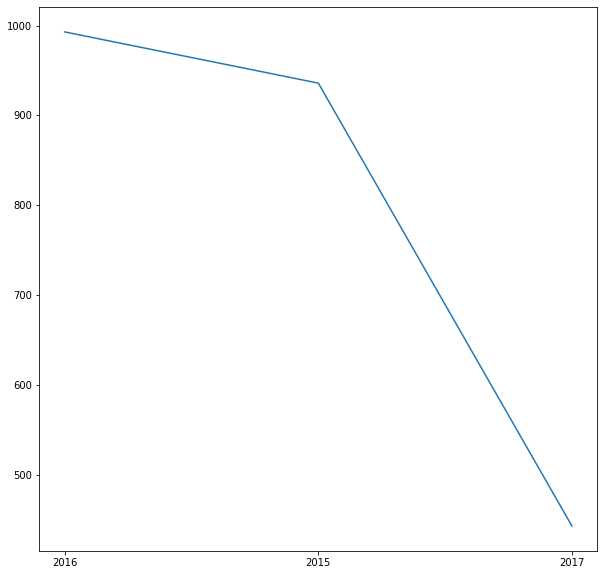

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) 
plt.plot(x,y)
plt.show()

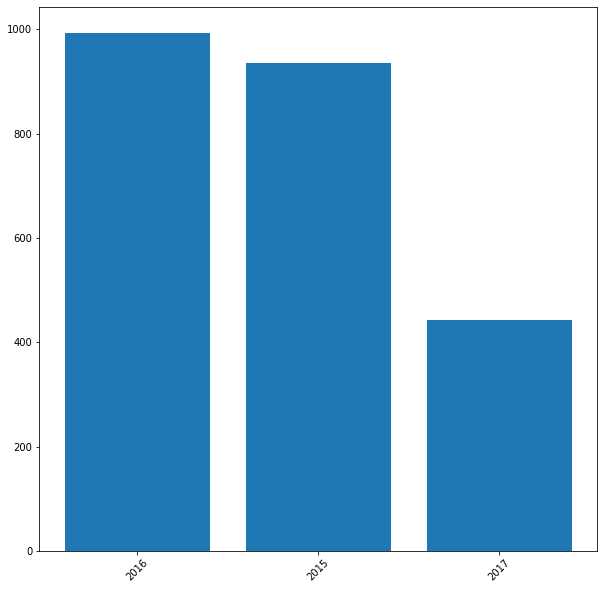

In [19]:
plt.figure(figsize=(10,10)) 
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

##TOP CITIES FOR STARTING A START-UP

---



In [20]:
def change(s):
  if(s=="delhi"):
    return "new delhi"
  return s
sf["CityLocation"]=sf["CityLocation"].apply(change)

In [21]:
def name_break(s):
  temp=""
  for i in range(len(s)):
    if s[i]=='/':
      break
    if s[i]==' ' and s[i+1]=='/':
      break
    temp+=s[i]
  return temp


sf["CityLocation"]=sf["CityLocation"].apply(name_break)

sf

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,01/08/2017,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000,unknown,2017
1,02/08/2017,ethinos,technology,digital marketing agency,mumbai,triton investment advisors,private equity,0,unknown,2017
2,02/08/2017,leverage edu,consumer internet,online platform for higher education services,new delhi,"kashyap deorah, anand sankeshwar, deepak jain,...",seed funding,0,unknown,2017
3,02/08/2017,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,500000,unknown,2017
4,02/08/2017,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,850000,unknown,2017
...,...,...,...,...,...,...,...,...,...,...
2367,29/01/2015,printvenue,unknown,unknown,unknown,asia pacific internet group,private equity,4500000,unknown,2015
2368,29/01/2015,graphene,unknown,unknown,unknown,karsemven fund,private equity,825000,govt backed vc fund,2015
2369,30/01/2015,mad street den,unknown,unknown,unknown,"exfinity fund, growx ventures.",private equity,1500000,unknown,2015
2370,30/01/2015,simplotel,unknown,unknown,unknown,makemytrip,private equity,0,"strategic funding, minority stake",2015


In [22]:
a = list(sf.value_counts("CityLocation").index)
b = list(sf.value_counts("CityLocation").values)
i = a.index('unknown')

In [23]:
x=a[:i]+a[i+1:]
x=x[:10]
y=b[:i]+b[i+1:]
y=y[:10]

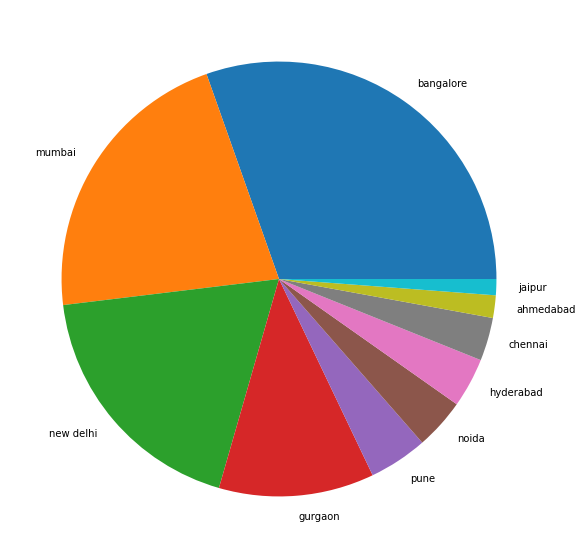

In [24]:
plt.figure(figsize=(10,10)) 
plt.pie(y,labels=x)
plt.show()

In [25]:
for i in range(11):
  if(a[i]=='unknown'):
    continue
  print(a[i]," ",b[i])

bangalore   635
mumbai   449
new delhi   389
gurgaon   241
pune   91
noida   79
hyderabad   77
chennai   67
ahmedabad   35
jaipur   25


##ROLE OF CITIES IN RECIEVING FUNDS FOR START-UPs


> CITIES V/S RECIEVING FUNDS



In [26]:
city_names = a.copy()

In [27]:
city_fund = dict()
total_fund = sf["AmountInUSD"].sum()
for e in city_names:
  ts = sf[sf["CityLocation"]==e]["AmountInUSD"].sum()
  city_fund[e]=ts
cl = list(city_fund.keys())
cf = list(city_fund.values())
di = {"City":cl,"Fund":cf}
cf = pd.DataFrame(di)
cf["Fund"] = cf["Fund"]*100/total_fund
cf.sort_values("Fund",ascending=False,inplace=True)

In [28]:
cf.reset_index(drop=True,inplace=True)

In [29]:
cf["Fund"]= round(cf["Fund"],ndigits=2)
cf

,City,Fund
0,bangalore,45.91
1,new delhi,15.36
2,mumbai,12.84
3,gurgaon,11.28
4,unknown,6.93
5,chennai,2.24
6,pune,2.00
7,hyderabad,1.06
8,noida,0.93
9,ahmedabad,0.54


In [30]:
t = cf[:10]
cf[:10]

,City,Fund
0,bangalore,45.91
1,new delhi,15.36
2,mumbai,12.84
3,gurgaon,11.28
4,unknown,6.93
5,chennai,2.24
6,pune,2.00
7,hyderabad,1.06
8,noida,0.93
9,ahmedabad,0.54


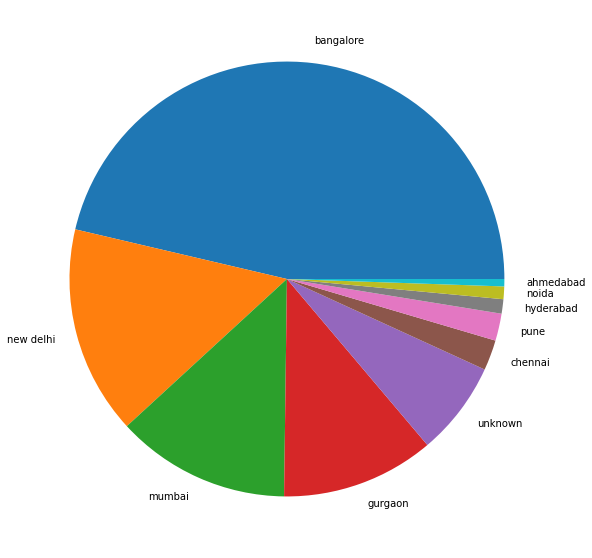

In [31]:
plt.figure(figsize=(10,10)) 
plt.pie(t["Fund"],labels=t["City"])
plt.xticks(rotation=60)
plt.show()

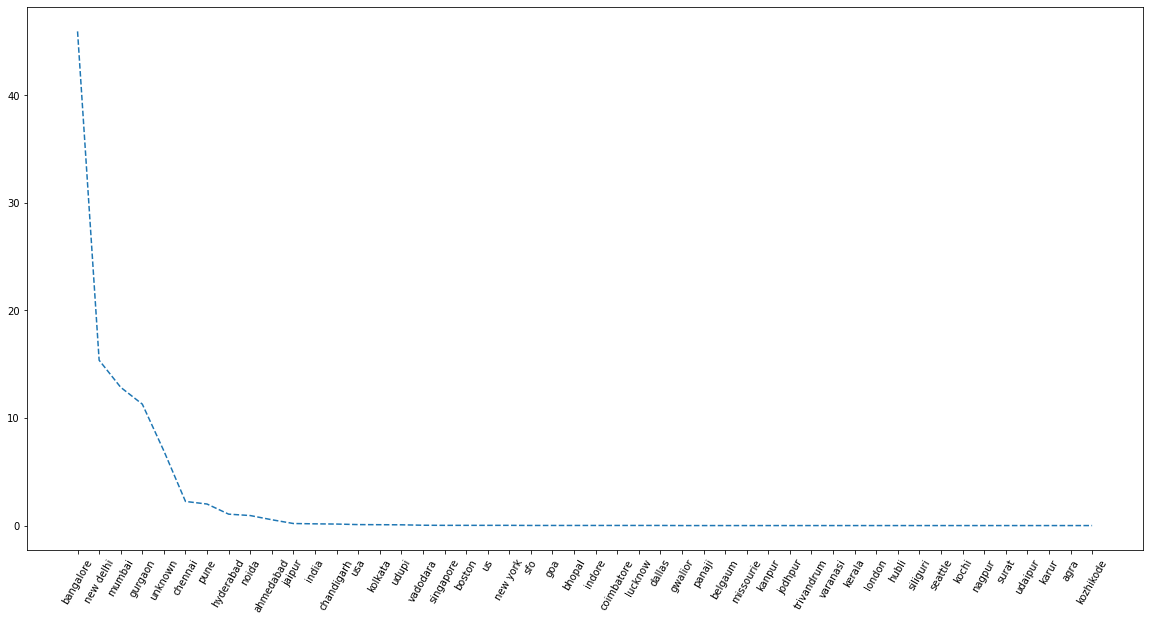

In [32]:
plt.figure(figsize=(20,10)) 
plt.plot(cf["City"],cf["Fund"],"--")
plt.xticks(rotation=60)
plt.show()

##INVESTMENT TYPE V/S RECIEVING FUNDS

In [33]:
sf.value_counts("InvestmentType")


InvestmentType
seed funding      1271
private equity    1066
seedfunding         30
crowd funding        2
unknown              1
privateequity        1
debt funding         1
dtype: int64

In [34]:
def correct_spell(s):
    if s=='seedfunding':
        return 'seed funding'
    if s=='privateequity':
        return 'private equity'
    return s
sf["InvestmentType"] = sf["InvestmentType"].apply(correct_spell)

In [35]:
sf.value_counts("InvestmentType")
it = list(sf.value_counts("InvestmentType").index[:-1])
it

['seed funding', 'private equity', 'crowd funding', 'unknown']

In [36]:
i_fund = dict()
for e in it:
    i_fund[e] = sf[sf["InvestmentType"]==e]['AmountInUSD'].sum()
i_fund

{'crowd funding': 155768,
 'private equity': 18007085000,
 'seed funding': 332345708,
 'unknown': 0}

In [37]:
i_value = list(i_fund.values())
total_fund = sum(i_value)

In [38]:
itype = list(i_fund.keys())

In [39]:
i_dict = {'itype':itype,"fund":i_value}
inv_df = pd.DataFrame(i_dict)

In [40]:
inv_df['fund']=inv_df['fund']*100/total_fund


In [41]:
inv_df=inv_df.sort_values('fund',ascending=False)

In [42]:
inv_df.reset_index(drop=True,inplace=True)

In [43]:
inv_df['fund'] = round(inv_df['fund'],ndigits=2)

In [44]:
inv_df

,itype,fund
0,private equity,98.19
1,seed funding,1.81
2,crowd funding,0.00
3,unknown,0.00


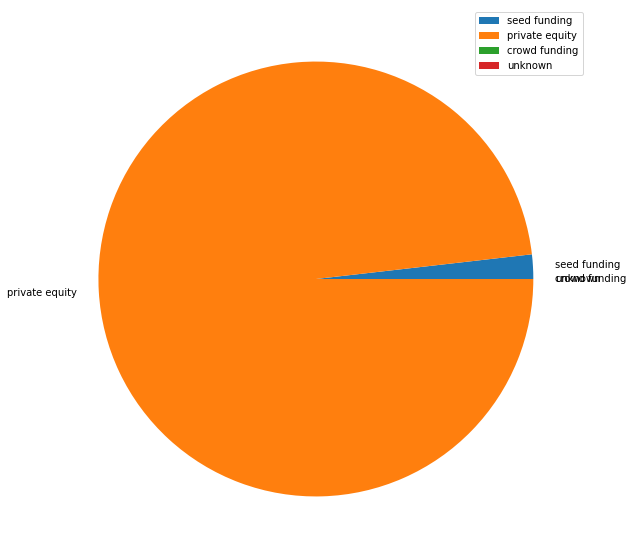

In [45]:
plt.figure(figsize=(10,10))
plt.pie(i_value,labels=itype)
plt.xticks(rotation=30)
plt.legend()
plt.show()

##INDUSTRY TYPE V/S RECIEVING FUNDS

In [46]:
sf.value_counts("IndustryVertical")

IndustryVertical
consumer internet                    772
technology                           313
ecommerce                            230
unknown                              171
healthcare                            31
                                    ... 
online grocery store                   1
online grocery delivery                1
online grocers                         1
online grocer                          1
360-degree view creating platform      1
Length: 729, dtype: int64

In [47]:
def correct_spell(s):
    if s=='ecommerce':
        return 'Ecommerce'
    return s
sf["IndustryVertical"] = sf["IndustryVertical"].apply(correct_spell)

In [48]:
sf.value_counts("IndustryVertical")

IndustryVertical
consumer internet                    772
technology                           313
Ecommerce                            230
unknown                              171
healthcare                            31
                                    ... 
online grocery store                   1
online grocery delivery                1
online grocers                         1
online grocer                          1
360-degree view creating platform      1
Length: 729, dtype: int64

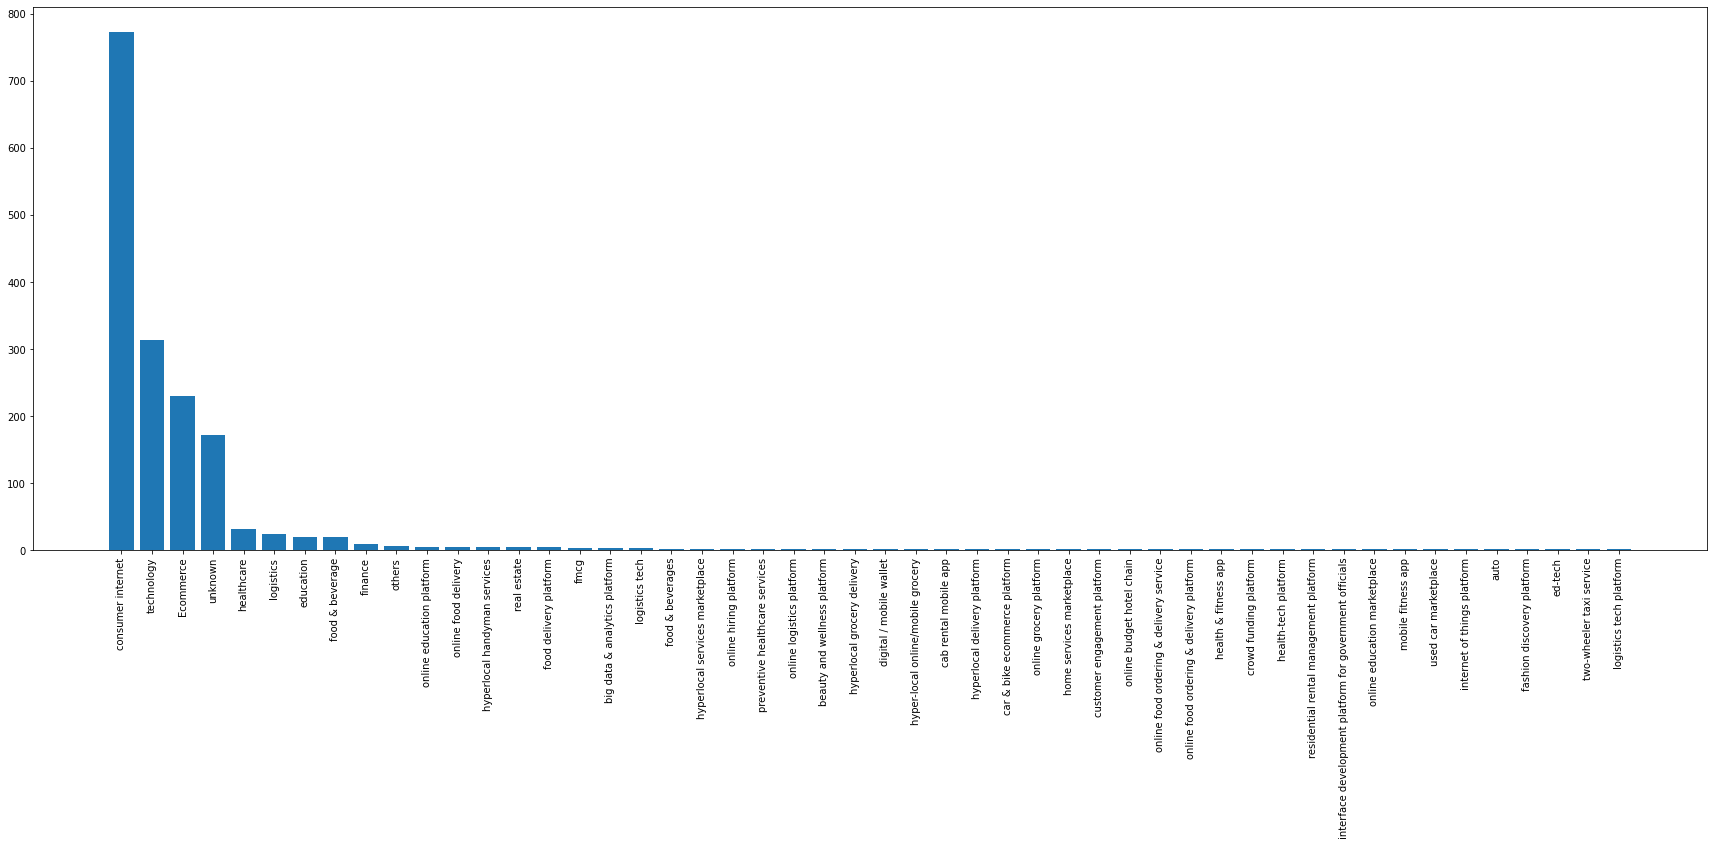

In [49]:
plt.figure(figsize=(30,10))
plt.bar(list(sf.value_counts("IndustryVertical").index[:50]),list(sf.value_counts("IndustryVertical").values[:50]))
plt.xticks(rotation=90)
plt.show()

In [50]:
ind_type = list(sf.value_counts("IndustryVertical").index)

In [51]:
industry_fund = dict()
for e in ind_type:
    industry_fund[e] = sf[sf["IndustryVertical"]==e]["AmountInUSD"].sum()

In [52]:
tind = list(industry_fund.keys())
ind_val = list(industry_fund.values())
ind_fund = {'industry':tind,'fund':ind_val}
industry_df = pd.DataFrame(ind_fund)

In [53]:
industry_df.sort_values("fund",ascending=False,inplace=True)

In [54]:
industry_df.reset_index(drop=True,inplace=True)

In [55]:
industry_df[:5]

,industry,fund
0,Ecommerce,4281189608
1,consumer internet,3797089000
2,unknown,1231811368
3,technology,1103593500
4,online marketplace,700000000


In [56]:
total_fund = sf['AmountInUSD'].sum()

In [57]:
industry_df['fund'] = round(industry_df['fund']*100/total_fund,ndigits=2)

In [62]:
t = industry_df[:10]
industry_df[:10]
# t.columns

,industry,fund
0,Ecommerce,23.33
1,consumer internet,20.70
2,unknown,6.71
3,technology,6.01
4,online marketplace,3.82
5,e-commerce & m-commerce platform,3.71
6,car aggregator & retail mobile app,2.73
7,ecommerce marketplace,2.73
8,cab aggregator,2.18
9,cab rental mobile app,1.23


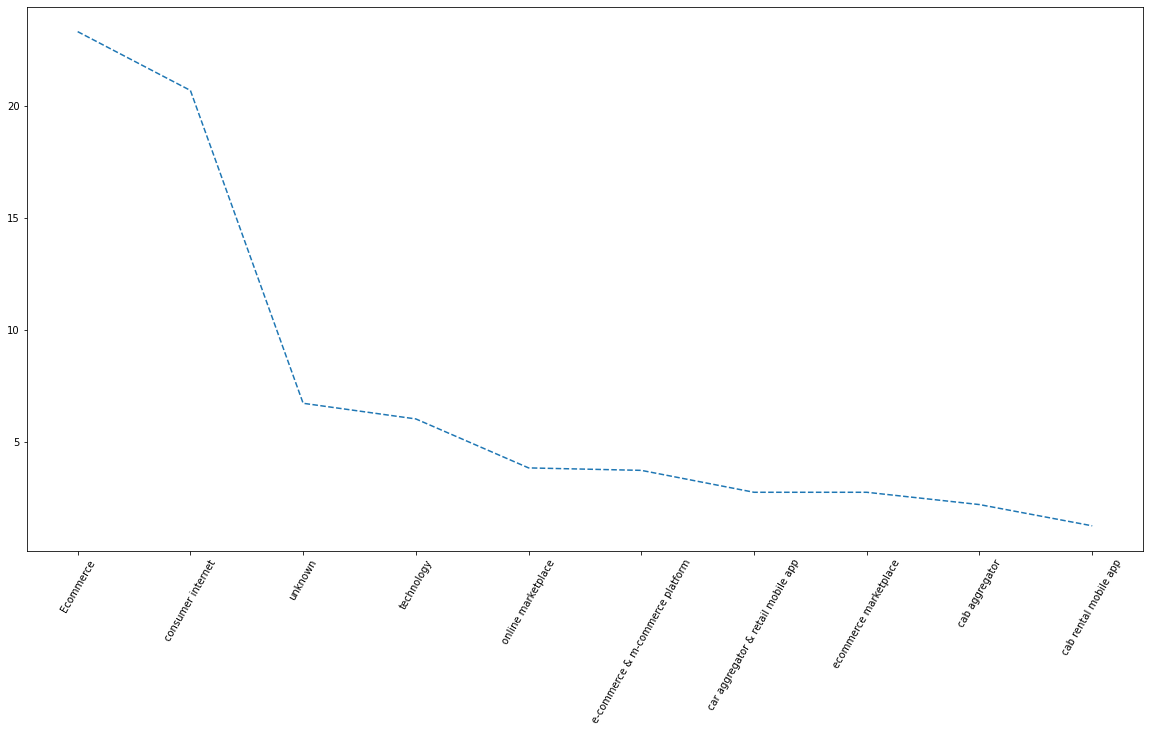

In [66]:
plt.figure(figsize=(20,10))
plt.plot(t['industry'],t['fund'],"--")
plt.xticks(rotation=60)
plt.show()

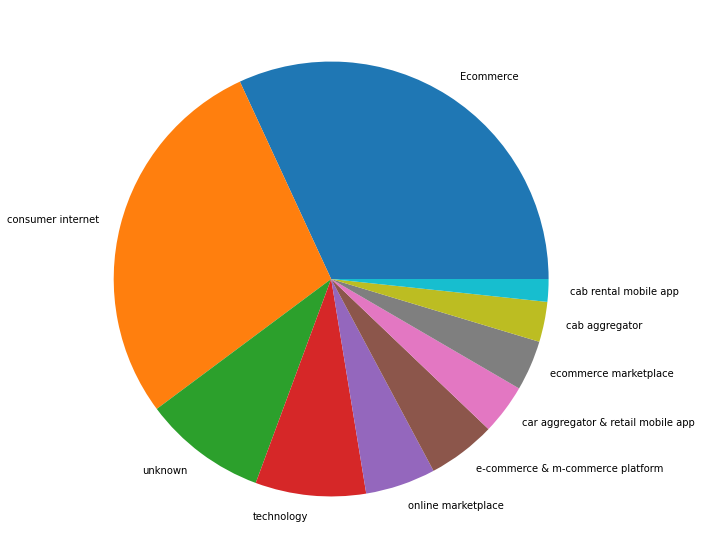

In [70]:
plt.figure(figsize=(20,10))
plt.pie(t['fund'],labels=t['industry'])
# plt.legend()
plt.show()

##TOP STARTUPS WITH HIGHEST FUNDINGS

In [71]:
sf.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,01/08/2017,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000,unknown,2017
1,02/08/2017,ethinos,technology,digital marketing agency,mumbai,triton investment advisors,private equity,0,unknown,2017
2,02/08/2017,leverage edu,consumer internet,online platform for higher education services,new delhi,"kashyap deorah, anand sankeshwar, deepak jain,...",seed funding,0,unknown,2017
3,02/08/2017,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,500000,unknown,2017
4,02/08/2017,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,850000,unknown,2017


In [72]:
def re_name(s):
    if s[:3]=='ola':
        return 'ola'
    return s

sf["StartupName"]=sf["StartupName"].apply(re_name)

In [73]:
def re_name(s):
    if s[:3]=='oyo':
        return 'oyo'
    return s

sf["StartupName"]=sf["StartupName"].apply(re_name)

In [74]:
def re_name(s):
    if s[:5]=='paytm':
        return 'paytm'
    return s

sf["StartupName"]=sf["StartupName"].apply(re_name)

In [75]:
def re_name(s):
    if s[:8]=='flipkart':
        return 'flipkart'
    return s

sf["StartupName"]=sf["StartupName"].apply(re_name)

In [76]:
startup_names=list(sf.value_counts("StartupName").index)

In [77]:
start_up_dict = dict()
for i in startup_names:
    start_up_dict[i] = sf[sf["StartupName"]==i]["AmountInUSD"].sum()

In [78]:
startup_names = list(start_up_dict.keys())
startup_fund=list(start_up_dict.values())

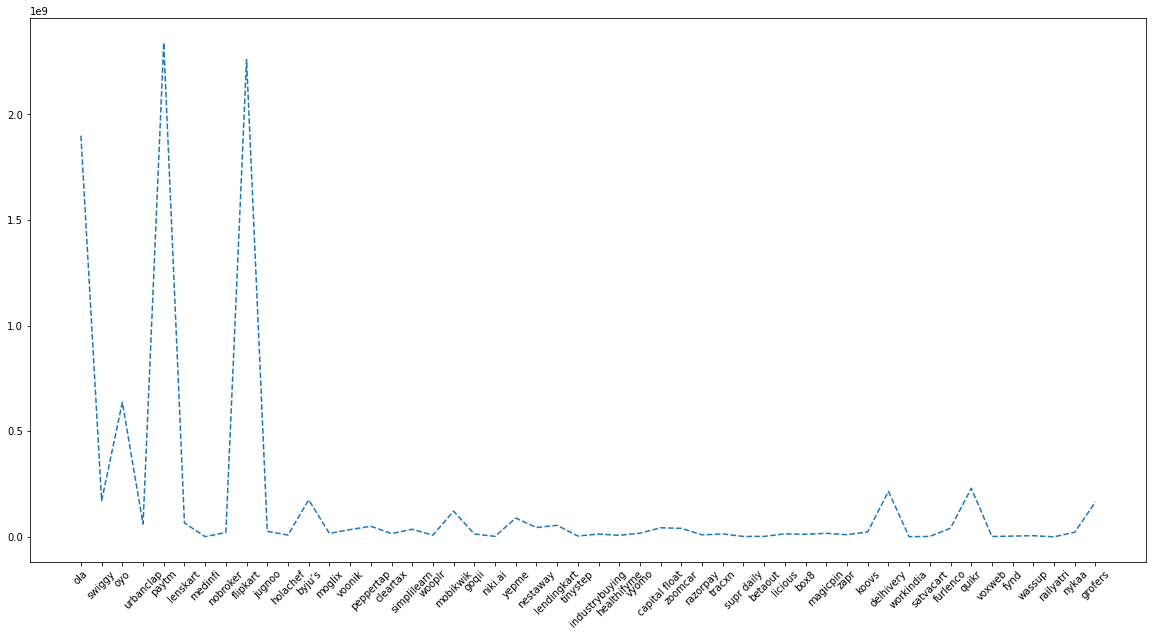

In [84]:
plt.figure(figsize=(20,10))
plt.plot(startup_names[:50],startup_fund[:50],"--")
plt.xticks(rotation=45)
plt.show()

In [85]:
sup_dict = {'Startup_name':startup_names,'fund':startup_fund}
startup_df = pd.DataFrame(sup_dict)

In [86]:
startup_df= startup_df.sort_values('fund',ascending=False).reset_index(drop=True)

In [87]:
startup_df

,Startup_name,fund
0,paytm,2340000000
1,flipkart,2259700000
2,ola,1899500000
3,snapdeal,700000000
4,oyo,637000000
...,...,...
1909,trackbizz,0
1910,autobix,0
1911,athletto,0
1912,asocon,0


In [88]:
startup_df[:5]

,Startup_name,fund
0,paytm,2340000000
1,flipkart,2259700000
2,ola,1899500000
3,snapdeal,700000000
4,oyo,637000000


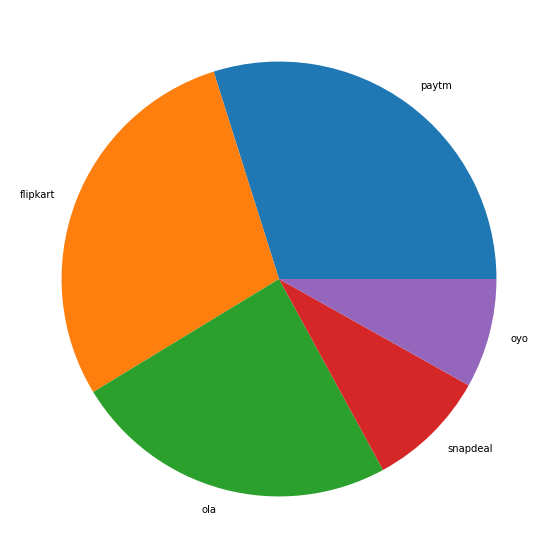

In [90]:
plt.figure(figsize=(10,10))
plt.pie(startup_df['fund'][:5],labels=startup_df['Startup_name'][:5])
plt.show()

##START-UPS THAT RECIEVED FUNDING MAXIMUM TIMES

In [92]:
sname = list(sf.value_counts("StartupName").sort_values(ascending=False).index)
stime = list(sf.value_counts("StartupName").sort_values(ascending=False).values)

In [93]:
for i in range(5):
    print(sname[i],"\t",stime[i])

ola 	 9
swiggy 	 7
oyo 	 7
urbanclap 	 6
paytm 	 6


##TOP INVESTORS FOR START-UPS

In [157]:
sf["InvestorsName"]

0                                             kae capital
1                              triton investment advisors
2       kashyap deorah, anand sankeshwar, deepak jain,...
3       kunal shah, letsventure, anupam mittal, hetal ...
4                          narottam thudi, shireesh palle
                              ...                        
2367                          asia pacific internet group
2368                                       karsemven fund
2369                       exfinity fund, growx ventures.
2370                                           makemytrip
2371                    uk based group of angel investors
Name: InvestorsName, Length: 2372, dtype: object

In [94]:
l = {'investor_name':[]}
def f(s):
    temp=""
    for i in range(len(s)):
        if(s[i]==','):
            l['investor_name'].append(temp)
            temp=""
            continue
        if(s[i]==" " and (s[i+1]==',' or s[i-1]==',')):
            continue
        temp+=s[i];

sf["InvestorsName"].apply(f)

0       None
1       None
2       None
3       None
4       None
        ... 
2367    None
2368    None
2369    None
2370    None
2371    None
Name: InvestorsName, Length: 2372, dtype: object

In [96]:
investor_name_df = pd.DataFrame(l)

In [97]:
investor_name_df

,investor_name
0,kashyap deorah
1,anand sankeshwar
2,deepak jain
3,sadashiva nt
4,arjun mehta
...,...
2200,goldman sachs
2201,inventus capital partners
2202,hillhouse capital
2203,kalaari capital


In [98]:
investor_name_df.value_counts("investor_name").sort_values(ascending=False)

investor_name
sequoia capital       40
accel partners        35
saif partners         24
blume ventures        21
kalaari capital       20
                      ..
swan angel network     1
swapan rajdev          1
t.v. mohandas pai      1
vishnu bhat            1
gaurav dalmia          1
Length: 1303, dtype: int64

In [99]:
temp_data = investor_name_df.value_counts("investor_name").sort_values(ascending=False)
name = temp_data.index
time = temp_data.values
name[0],time[0]

('sequoia capital', 40)

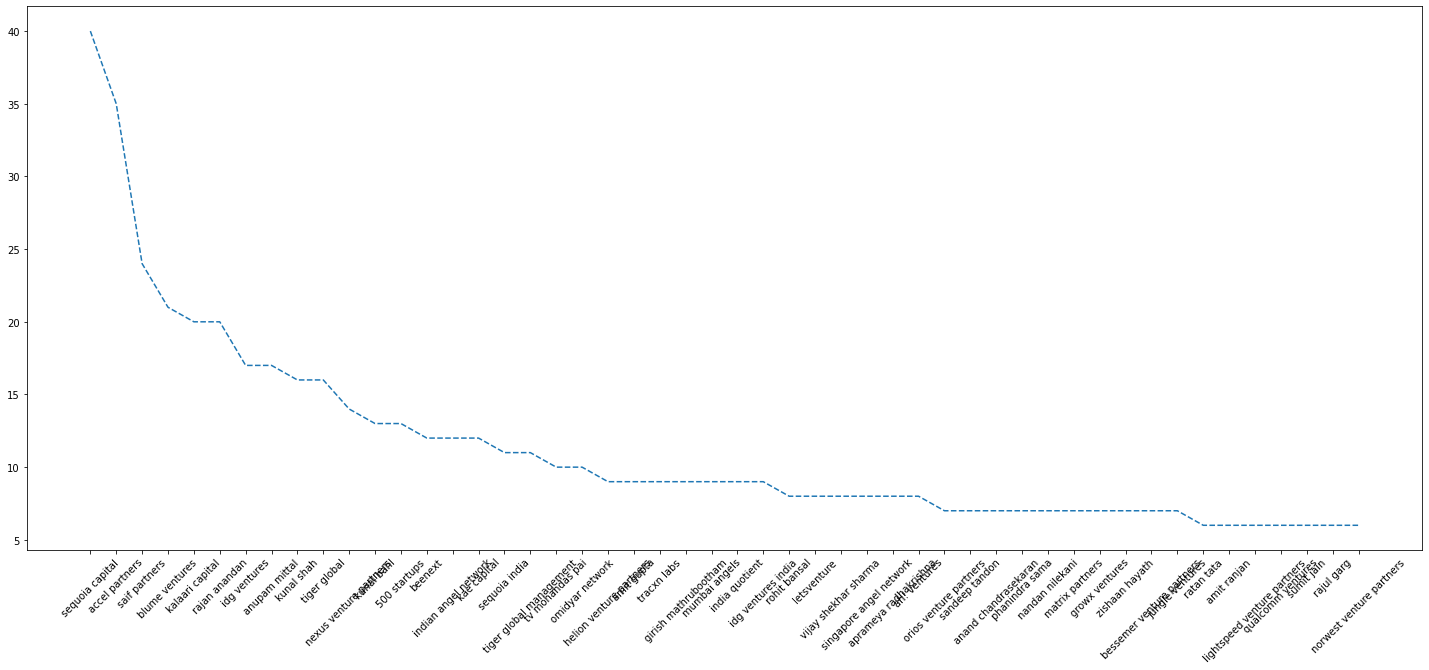

In [101]:
plt.figure(figsize=(25,10))
plt.plot(name[:50],time[:50],"--")
plt.xticks(rotation=45)
plt.show()


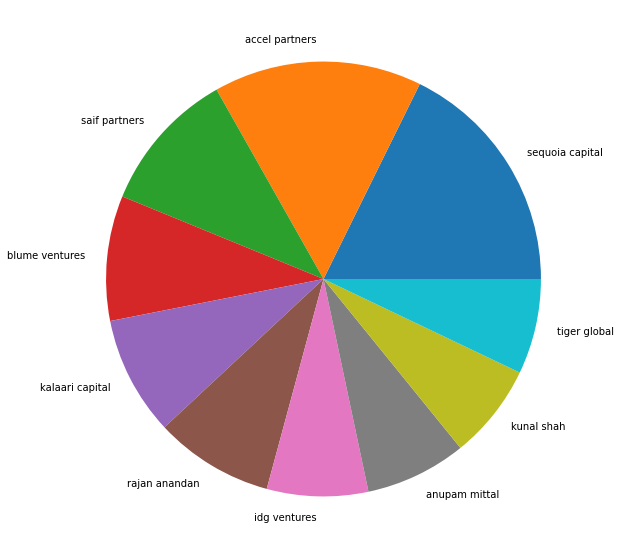

In [103]:
plt.figure(figsize=(25,10))
plt.pie(time[:10],labels = name[:10])
plt.show()